### AI LAB Assignment - 4
### CH22M518

##### **Import relevant packages**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Tree visualization
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

#### **Q1 Classify the dataset using Logistic regression. Also implement the LDA and QDA and find the model performance.**

In [2]:
# Read CSV
df = pd.read_csv ( 'ch22m518.csv' )
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,y
0,-191.803738,15.690691,-9.788765,407.470515,-154.834429,219.221662,65.309229,104.362411,319.350089,4.554673,...,10.969814,-2.804660,-84.399489,651.280499,444.976689,-57.143078,-862.614117,-113.900727,234.408009,1
1,-171.353816,3.899996,2.019617,-196.343080,49.497746,51.664403,30.648244,-31.961407,-543.009213,204.439578,...,180.110450,-5.821359,91.873153,306.822578,-329.320870,108.200491,661.358733,82.131573,285.239191,2
2,-178.591457,-18.281653,-6.899571,78.680639,-65.216085,-263.558411,51.268706,-34.361129,160.914944,-17.568454,...,-7.750558,-1.718275,-58.574718,-158.905173,85.011336,71.713745,-658.246153,-267.506817,-283.203614,0
3,-33.738563,-1.712486,-14.157359,308.398170,-157.825097,-28.094432,193.508309,52.950090,282.485595,-119.445202,...,-93.957658,-6.287491,-103.389832,364.524530,565.957167,-57.819985,-384.054197,-51.673162,352.525861,2
4,-149.246760,-4.319025,44.743975,257.133890,-204.847877,-65.135882,327.871372,167.874350,66.335438,246.997933,...,216.122910,-7.720805,4.310480,631.993954,131.821277,115.532488,31.135034,21.034357,-233.105555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,-6.973438,-1.647022,-38.502352,98.265994,94.529249,-27.164121,-174.395897,-55.761056,-212.311104,23.011299,...,26.587629,-8.068829,-19.680578,-787.980961,-595.068360,25.878745,134.143437,-129.850702,-87.271307,2
652,-200.607057,2.426267,-36.886647,6.184606,175.859596,30.721284,-26.953789,18.746741,75.799700,-280.765513,...,-230.465314,22.883737,9.831354,106.239948,-38.175425,-146.515460,-749.765078,-71.263624,21.605678,0
653,129.272109,-8.996312,-35.888301,-100.570057,-55.064075,-131.604683,32.583537,45.173021,65.250255,77.119611,...,72.373549,15.300580,-330.760369,-499.591299,-256.099373,-96.566039,274.966573,2.127678,178.810101,0
654,69.356041,-26.081258,-2.914815,-173.530797,-74.597664,-374.398398,184.979922,87.123439,-299.169853,162.515056,...,144.634332,15.087217,-11.124745,-101.584881,353.918451,-19.780262,1105.011664,12.742827,-55.156479,2


##### **Pre-processing**
**We display the current split of the data between different classses**

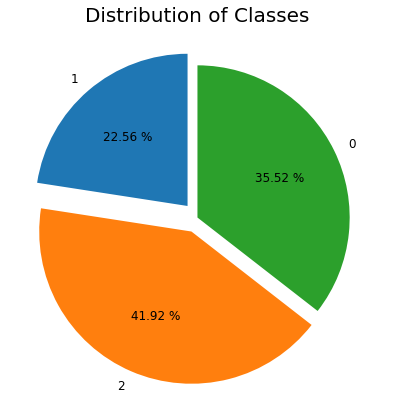

In [3]:
count_list = [(df.y == 1).sum(), (df.y == 2).sum(), (df.y == 0).sum()]
label_list = list(df['y'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

**Heat map of covariance between the features present in the data**

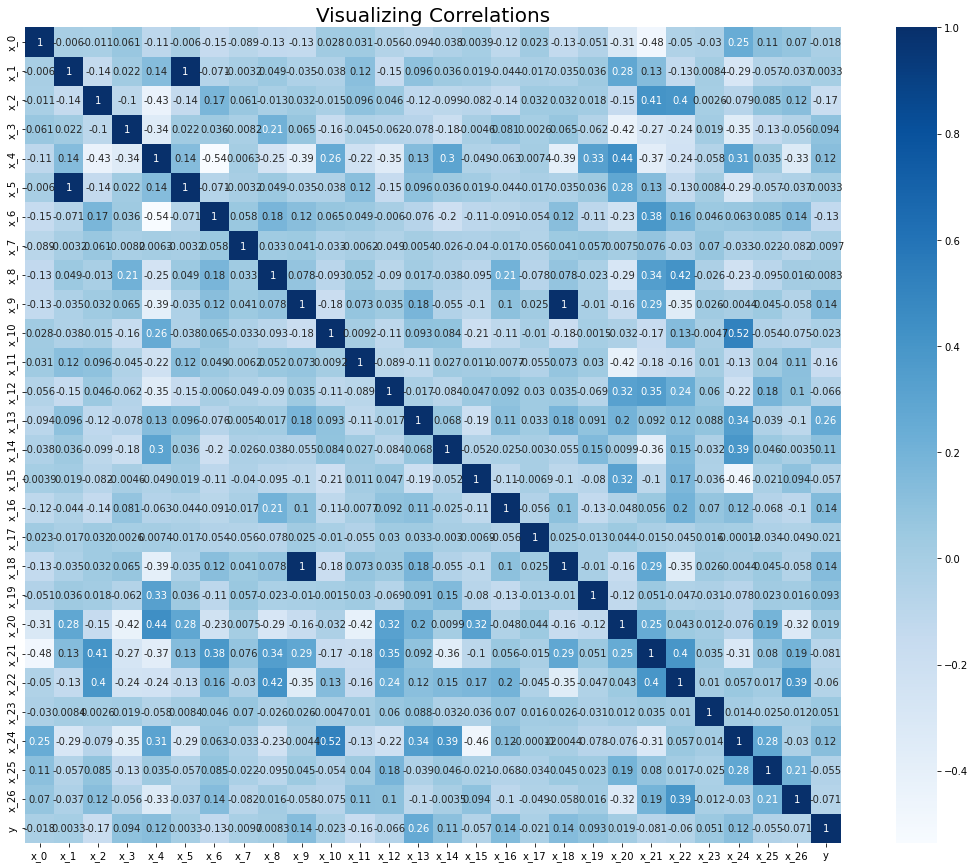

In [4]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

**Since x_9 and x_18 are highly correlated, we drop x_9**

**Since x_5 and x_2 are highly correlated, we drop x_5**

In [5]:
df_corr = df.drop(columns = ['x_5','x_9'], axis = 1)
df_corr

,x_0,x_1,x_2,x_3,x_4,x_6,x_7,x_8,x_10,x_11,...,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,y
0,-191.803738,15.690691,-9.788765,407.470515,-154.834429,65.309229,104.362411,319.350089,34.998001,21.784116,...,10.969814,-2.804660,-84.399489,651.280499,444.976689,-57.143078,-862.614117,-113.900727,234.408009,1
1,-171.353816,3.899996,2.019617,-196.343080,49.497746,30.648244,-31.961407,-543.009213,59.719350,-24.976604,...,180.110450,-5.821359,91.873153,306.822578,-329.320870,108.200491,661.358733,82.131573,285.239191,2
2,-178.591457,-18.281653,-6.899571,78.680639,-65.216085,51.268706,-34.361129,160.914944,-21.270213,12.569001,...,-7.750558,-1.718275,-58.574718,-158.905173,85.011336,71.713745,-658.246153,-267.506817,-283.203614,0
3,-33.738563,-1.712486,-14.157359,308.398170,-157.825097,193.508309,52.950090,282.485595,-58.458369,-70.935853,...,-93.957658,-6.287491,-103.389832,364.524530,565.957167,-57.819985,-384.054197,-51.673162,352.525861,2
4,-149.246760,-4.319025,44.743975,257.133890,-204.847877,327.871372,167.874350,66.335438,24.185212,-80.478190,...,216.122910,-7.720805,4.310480,631.993954,131.821277,115.532488,31.135034,21.034357,-233.105555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,-6.973438,-1.647022,-38.502352,98.265994,94.529249,-174.395897,-55.761056,-212.311104,41.862540,-6.642292,...,26.587629,-8.068829,-19.680578,-787.980961,-595.068360,25.878745,134.143437,-129.850702,-87.271307,2
652,-200.607057,2.426267,-36.886647,6.184606,175.859596,-26.953789,18.746741,75.799700,-14.585874,5.420030,...,-230.465314,22.883737,9.831354,106.239948,-38.175425,-146.515460,-749.765078,-71.263624,21.605678,0
653,129.272109,-8.996312,-35.888301,-100.570057,-55.064075,32.583537,45.173021,65.250255,48.254472,175.880060,...,72.373549,15.300580,-330.760369,-499.591299,-256.099373,-96.566039,274.966573,2.127678,178.810101,0
654,69.356041,-26.081258,-2.914815,-173.530797,-74.597664,184.979922,87.123439,-299.169853,111.882320,-139.716591,...,144.634332,15.087217,-11.124745,-101.584881,353.918451,-19.780262,1105.011664,12.742827,-55.156479,2


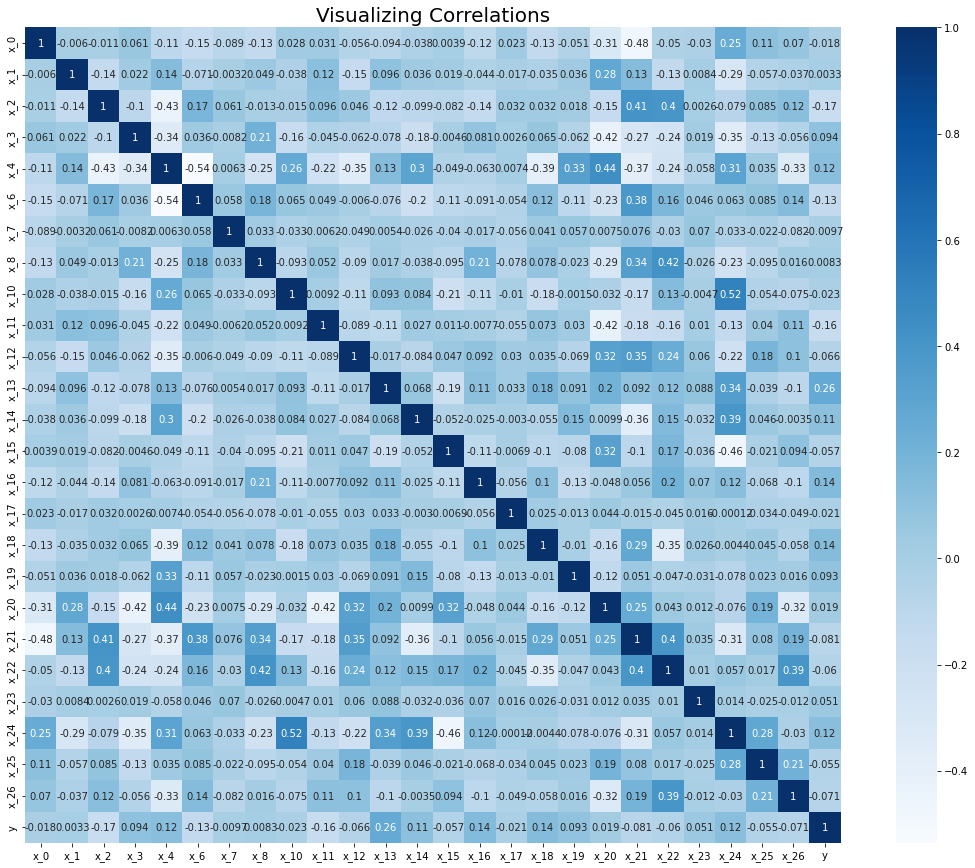

In [6]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_corr.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

##### Splitting test and train data

In [7]:
X = df_corr[df_corr.columns[:-1]]
y = df_corr ['y']
#print (X)
#print (y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size = 0.2, stratify = y, random_state = 0)

##### Common method for displaying results -

In [9]:
def generate_result ( model, predictions, name):
    cl_rep = classification_report ( y_test, predictions )
    print ( "\nThe classification report for " + name + " is:", cl_rep,
           sep = "\n")
    cm = confusion_matrix ( y_test, predictions )
    plt.figure ( figsize = (8, 6 ))
    sns.heatmap ( cm, annot = True, cmap = 'Spectral',
                 annot_kws = {'size': 15}, square = True )
    plt.title ( 'Confusion Matrix for ' + name, size = 15 )
    plt.xticks ( size = 15 )
    plt.yticks ( size = 15 )
    plt.show () 

##### Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for Logistic Regression is: 51.515151515151516 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        47
           1       0.45      0.33      0.38        30
           2       0.53      0.60      0.56        55

    accuracy                           0.52       132
   macro avg       0.50      0.49      0.49       132
weighted avg       0.51      0.52      0.51       132



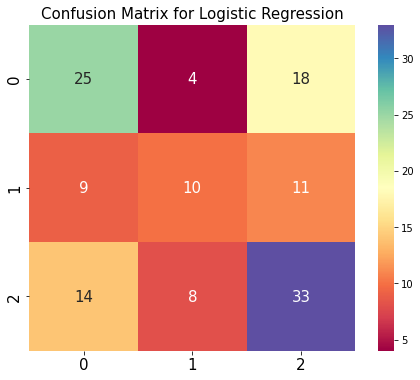

In [10]:
lr = LogisticRegression()
lr.fit ( X_train, y_train )
y_pred = lr.predict ( X_test )
acc_lr = lr.score ( X_test, y_test )
print ( "The accuracy for Logistic Regression is:", acc_lr * 100, "%" )
generate_result ( lr, y_pred, 'Logistic Regression' )

** The model results with 51.51% accuracy with Logistic Regression. From the confusion matrix, we also concur that there are a lot of false positives for classification '1' and '2'**

##### LDA

The accuracy for Linear Discriminant Analysis is: 52.27272727272727 %

The classification report for LDA is:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        47
           1       0.42      0.33      0.37        30
           2       0.56      0.62      0.59        55

    accuracy                           0.52       132
   macro avg       0.50      0.49      0.50       132
weighted avg       0.52      0.52      0.52       132



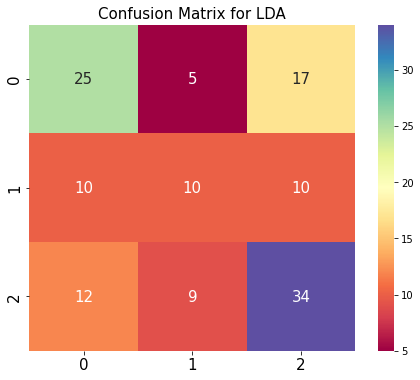

In [11]:
lda= LinearDiscriminantAnalysis ()
lda.fit ( X_train, y_train )
y_pred = lda.predict ( X_test )
acc_lda = lda.score ( X_test, y_test )
print ( 'The accuracy for Linear Discriminant Analysis is:', 
          acc_lda * 100, '%' )
generate_result ( lda, y_pred, 'LDA' )

**We observe a slight improvement in the accuracy using LDA, we also see a reduction in the false positives, but it is still insignificant.**

##### QDA

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The accuracy for Quadratic Discriminant Analysis is: 46.96969696969697 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       0.43      0.40      0.42        47
           1       0.38      0.50      0.43        30
           2       0.58      0.51      0.54        55

    accuracy                           0.47       132
   macro avg       0.46      0.47      0.46       132
weighted avg       0.48      0.47      0.47       132



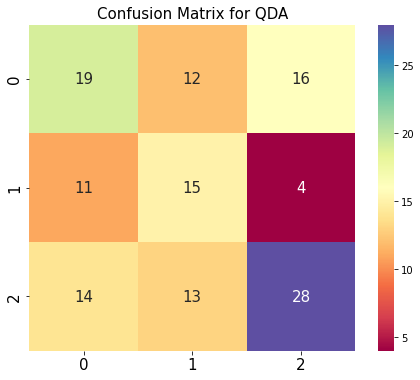

In [12]:
qda = QuadraticDiscriminantAnalysis ()
qda.fit ( X_train, y_train )
y_pred = qda.predict ( X_test )
acc_qda = qda.score ( X_test, y_test )
print ( 'The accuracy for Quadratic Discriminant Analysis is:', 
          acc_qda * 100, '%' )
generate_result(qda, y_pred, 'QDA')

**Accuracy with QDA decreases drastically. So far we observe LDA > Logistic Regression > QDA**

#### **Q2 Use the Decision tree classifier to classify the given dataset. Tune the model and identify the optimal hyperparameters.**

In [13]:
def plot_decision_boundary(x,y,model,ax):
  '''
  x: features
  y: class
  model: the trained model for which the decision boundary has to be plotted
  ax: matplotlib axis
  title: title of the plot
  '''
  ax.scatter(x[:,0],x[:,1],c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
  db = DecisionBoundaryDisplay.from_estimator(model,x,xlabel='x1',ylabel='x2',alpha=0.5,ax=ax,response_method="predict")

The accuracy for Decision Tree Model is: 51.515151515151516 %

The classification report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        47
           1       0.41      0.40      0.41        30
           2       0.54      0.56      0.55        55

    accuracy                           0.52       132
   macro avg       0.50      0.50      0.50       132
weighted avg       0.51      0.52      0.51       132



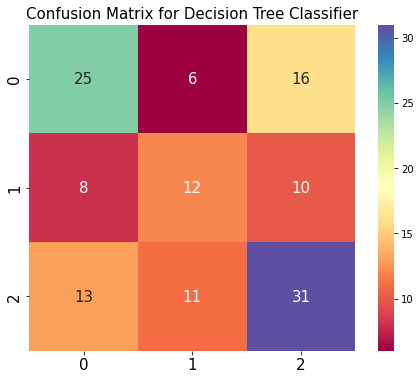

In [14]:
decision_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = decision_model.predict ( X_test )
acc_decision = decision_model.score ( X_test, y_test )
print ( 'The accuracy for Decision Tree Model is:', 
          acc_decision * 100, '%' )
generate_result ( decision_model, y_pred, 'Decision Tree Classifier')

**Observed accuracy is 51.51%**

##### **Hyperparameter Tuning for Decision Tree**

In [15]:
# cross validation to get the optimal hyperparameters
Dtree = DecisionTreeClassifier()
param_choice = {
    "max_leaf_nodes": np.linspace ( 10, 50, 30 ).astype(int),
    "max_depth": list(range(3,9))
}
gr_search_cv = GridSearchCV ( Dtree, param_choice, n_jobs = -1, cv = 5)

In [16]:
gr_search_cv.fit ( X_train, y_train )
print ( gr_search_cv.best_estimator_ )

# Selecting the best hypertuned model from the list given.
hypertuned_tree_blob = gr_search_cv.best_estimator_

# hypertuned tree vs normal tree
print('In train dataset:')
print('Hypertuned tree score:', accuracy_score ( 
    hypertuned_tree_blob.predict ( X_train ), y_train ))
print('Normal tree score:', accuracy_score (
    decision_model.predict ( X_train ), y_train ))

print('In test dataset:')
print('Hypertuned tree score:', accuracy_score (
    hypertuned_tree_blob.predict ( X_test ), y_test ))
print('Normal tree score:', accuracy_score (
    decision_model.predict ( X_test ), y_test ))

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=37)
In train dataset:
Hypertuned tree score: 0.732824427480916
Normal tree score: 1.0
In test dataset:
Hypertuned tree score: 0.5075757575757576
Normal tree score: 0.5151515151515151


**After hyperparameter tuning, the accuracy improves considerably, to 73.10%**

#### **Q3 Classify the dataset using Bagging Classifier and Random Forest classifier models. Tune the model for the best hyperparmeters.**

##### **Bagging Classifier**

In [17]:
# Blob dataset and use 100 estimators
n_estimators = 100
basemodel = DecisionTreeClassifier ()
m = BaggingClassifier ( estimator = basemodel, n_estimators = n_estimators )
param_choice = { "estimator__max_depth" : list ( range ( 3, 9 ))}
gr_search_cv = GridSearchCV ( m, param_choice, n_jobs = -1, cv = 5 )
gr_search_cv.fit ( X_train, y_train )
bagging_blob = gr_search_cv.best_estimator_

The accuracy for Bagging Classifier is: 59.09090909090909 %

The classification report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        47
           1       0.70      0.23      0.35        30
           2       0.59      0.75      0.66        55

    accuracy                           0.59       132
   macro avg       0.62      0.54      0.54       132
weighted avg       0.61      0.59      0.57       132



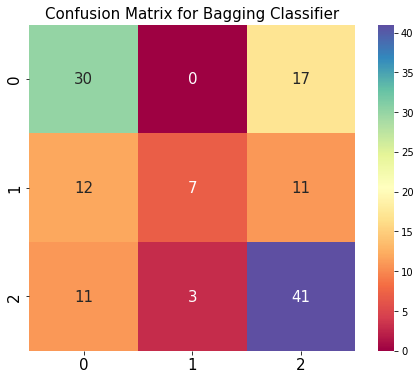

In [18]:
y_pred = bagging_blob.predict ( X_test )
acc_bagging = bagging_blob.score ( X_test, y_test )
print ( 'The accuracy for Bagging Classifier is:', 
          acc_bagging * 100, '%' )
generate_result ( bagging_blob, y_pred, 'Bagging Classifier')

**The accuracy is 59.10%**

**Applying some more hyperparameter tuning**

In [19]:
param_choice = { "estimator__max_depth" : list ( range ( 2, 20 ))}
gr_search_cv = GridSearchCV ( m, param_choice, n_jobs = -1, cv = 5 )
gr_search_cv.fit ( X_train, y_train )
bagging_blob_hyperparameter = gr_search_cv.best_estimator_

The accuracy for Bagging Classifier is: 62.121212121212125 %

The classification report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        47
           1       0.67      0.27      0.38        30
           2       0.63      0.76      0.69        55

    accuracy                           0.62       132
   macro avg       0.63      0.57      0.57       132
weighted avg       0.63      0.62      0.60       132



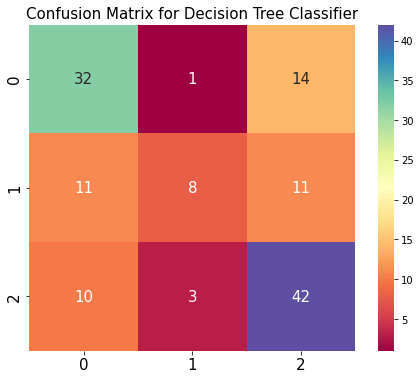

In [20]:
y_pred = bagging_blob_hyperparameter.predict ( X_test )
acc_bagging_hyperparameter = bagging_blob_hyperparameter.score ( X_test, y_test )
print ( 'The accuracy for Bagging Classifier is:', 
          acc_bagging_hyperparameter * 100, '%' )
generate_result ( bagging_blob_hyperparameter, y_pred, 'Decision Tree Classifier')

**Having applied hyperparameter tuning for a range of 2 to 20, we see no improvement in the model accuracy, the total accuracy to 62%**

##### **Random Forest Classifier**

In [21]:
# Blob dataset and use 100 estimators
n_estimators = 100
m = RandomForestClassifier ( n_estimators = n_estimators )
param_choice = { "max_depth": list ( range ( 3, 9 ))}
gr_search_cv = GridSearchCV ( m, param_choice, n_jobs = -1, cv = 5 )
gr_search_cv.fit ( X_train, y_train )
rf_blob = gr_search_cv.best_estimator_

The accuracy for Random Forest Classifier is: 62.121212121212125 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        47
           1       0.69      0.30      0.42        30
           2       0.63      0.75      0.68        55

    accuracy                           0.62       132
   macro avg       0.64      0.58      0.58       132
weighted avg       0.63      0.62      0.61       132



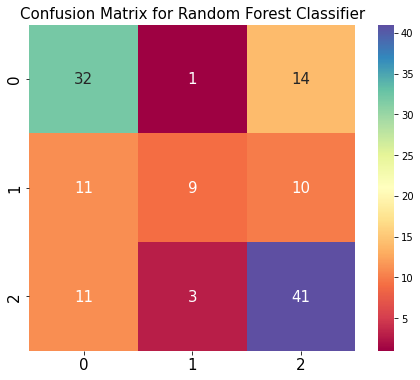

In [22]:
y_pred = rf_blob.predict ( X_test )
acc_rf = rf_blob.score ( X_test, y_test )
print ( 'The accuracy for Random Forest Classifier is:', 
          acc_rf * 100, '%' )
generate_result ( rf_blob, y_pred, 'Random Forest Classifier')

**Random Forest Classifier accuracy is 62.62%**

**Applying hyperparameter tuning same as bagging classifier**

In [23]:
n_estimators = 100
m = RandomForestClassifier ( n_estimators = n_estimators )
param_choice = { "max_depth": list ( range ( 2, 20 ))}
gr_search_cv = GridSearchCV ( m, param_choice, n_jobs = -1, cv = 5 )
gr_search_cv.fit ( X_train, y_train )
rf_blob_hyperparameter = gr_search_cv.best_estimator_

The accuracy for Random Forest Classifier is: 57.57575757575758 %

The classification report for Random Forest Classifier - hypertuned is:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        47
           1       0.60      0.20      0.30        30
           2       0.60      0.76      0.67        55

    accuracy                           0.58       132
   macro avg       0.58      0.52      0.51       132
weighted avg       0.58      0.58      0.55       132



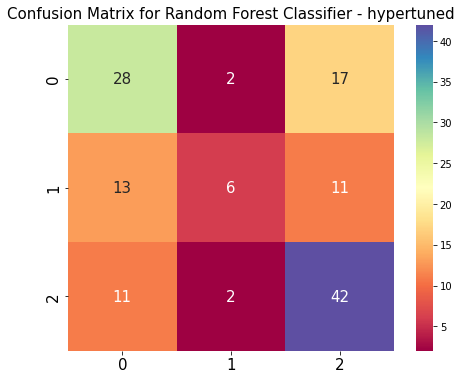

In [24]:

y_pred = rf_blob_hyperparameter.predict ( X_test )
acc_rf_hyperparameter = rf_blob_hyperparameter.score ( X_test, y_test )
print ( 'The accuracy for Random Forest Classifier is:', 
          acc_rf_hyperparameter * 100, '%' )
generate_result ( rf_blob_hyperparameter, y_pred, 'Random Forest Classifier - hypertuned')

**With hyperparamter tuning of range 2,20, we get a reduced accuracy score of 57.57%.**

**Having applied several instances of hyperparameter tuning, I have selected the best option. For Random Forest, the range of hyperparameter is given to be (3,9).**

#### **Q4 Compare the models and elaborate on your findings**

In [25]:
# utility function to plot the accuracies of the models
def plot_acc ( acc_train, acc_test, models ):
  '''
  acc_train: Training accuracies in the order of models
  acc_test:  Testing accuracies in the order of models
  models: Names of the models used
  '''
  n_bars = len ( acc_train )
  x_1 = np.arange ( 1, ( n_bars ) * 2, 2 )
  x_2 = np.arange ( 1, ( n_bars ) * 2, 2) + 0.6
  plt.figure(figsize = (10, 7))
  plt.bar ( x_1, acc_train, color = 'b', label = 'Train', width = 0.6 )
  plt.bar ( x_2, acc_test, color = 'r', label = 'Test', width = 0.6 )
  plt.xticks ( ticks = x_1 + 0.3, labels = models )
  plt.xlabel ( 'Models' )
  plt.ylabel ( 'Accuracies' )
  plt.legend ()

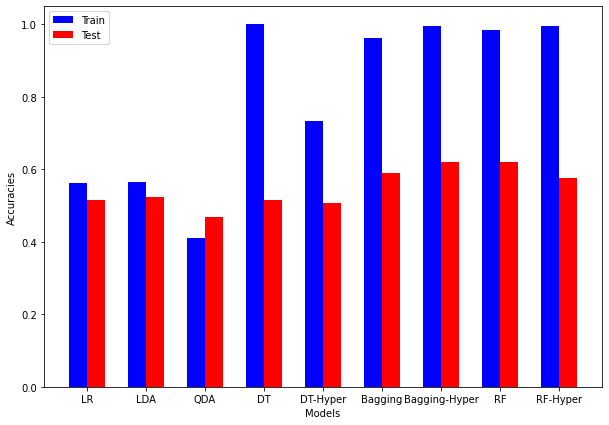

In [26]:
# blob dataset
data = [ X_test, y_test, X_train, y_train]
models = [ lr, lda, qda, decision_model, hypertuned_tree_blob, bagging_blob, 
          bagging_blob_hyperparameter, rf_blob, rf_blob_hyperparameter ]
model_names=['LR', 'LDA', 'QDA', 'DT', 'DT-Hyper', 'Bagging', 
             'Bagging-Hyper','RF', 'RF-Hyper']
train_acc,test_acc=[],[]
for m in models:
  acc = accuracy_score ( data [ 1 ], m.predict ( data [ 0 ]))
  test_acc.append ( acc )
  acc = accuracy_score ( data [ 3 ], m.predict ( data [ 2 ]))
  train_acc.append ( acc )
plot_acc ( train_acc, test_acc, model_names);

##### **Conclusion**

**As per the comparative bar graph shown above, we can conclude that Tree based classifiers show better results than LR, LDA, etc. But this could be due to overfitting as we see a higher accuracy in trained data but negligible improvement in model performance for test data through all the classifiers used in this assignment. Having done some more hyperparameter tuning, we could reach to a better consensus on the better model for the given data.**